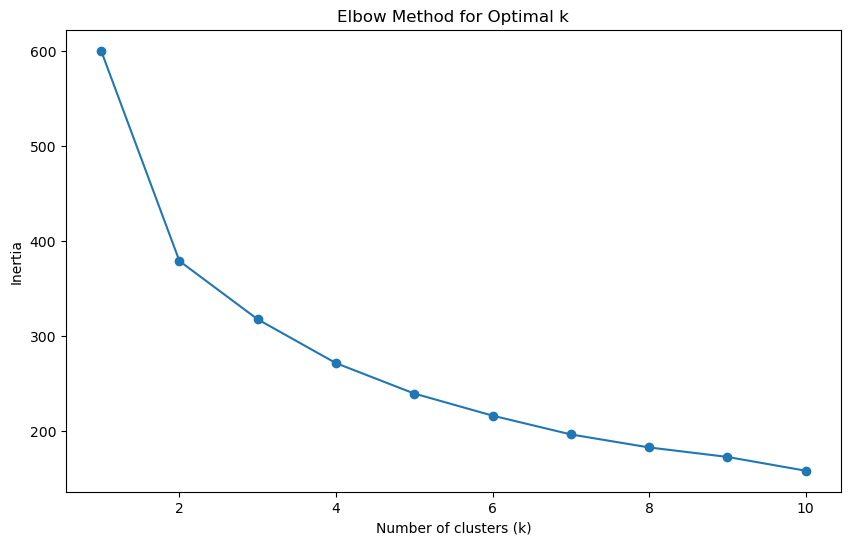

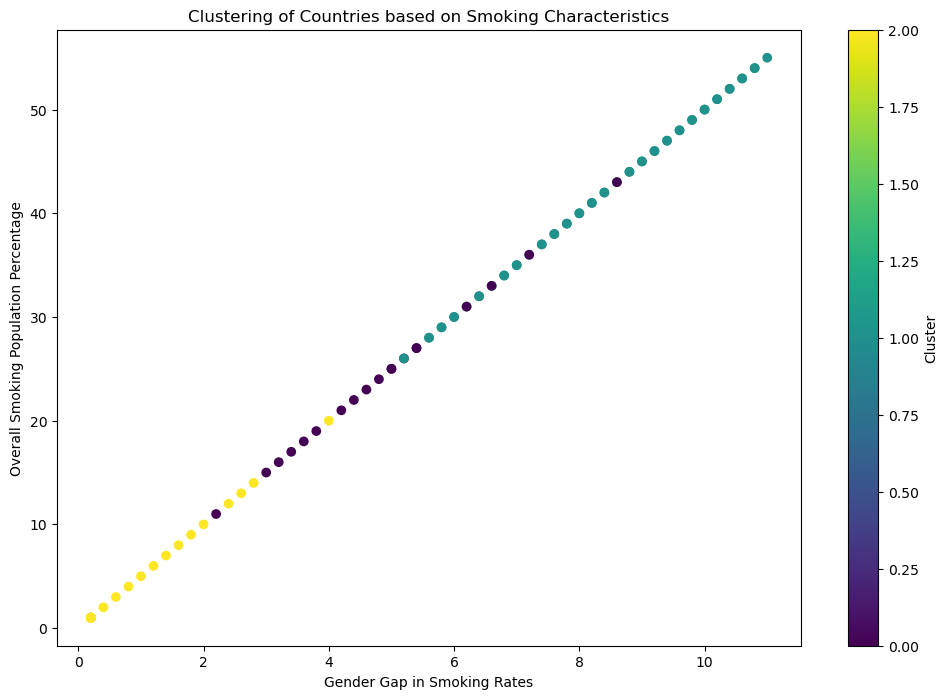

Cluster Characteristics:
         Gender_Gap  Smoking_Population_Percentage  Legislation_Strength  \
Cluster                                                                    
0          4.600000                      23.000000              8.300000   
1          8.276923                      41.384615              4.288462   
2          0.914286                       4.571429              5.142857   

         Anti_Smoking_Campaigns  Healthcare_Costs_Normalized  \
Cluster                                                        
0                     30.900000                     0.815644   
1                     53.653846                    -0.185937   
2                     56.285714                    -0.237291   

         Youth_Smokers_Percentage  
Cluster                            
0                        4.480030  
1                        7.991501  
2                        0.894451  


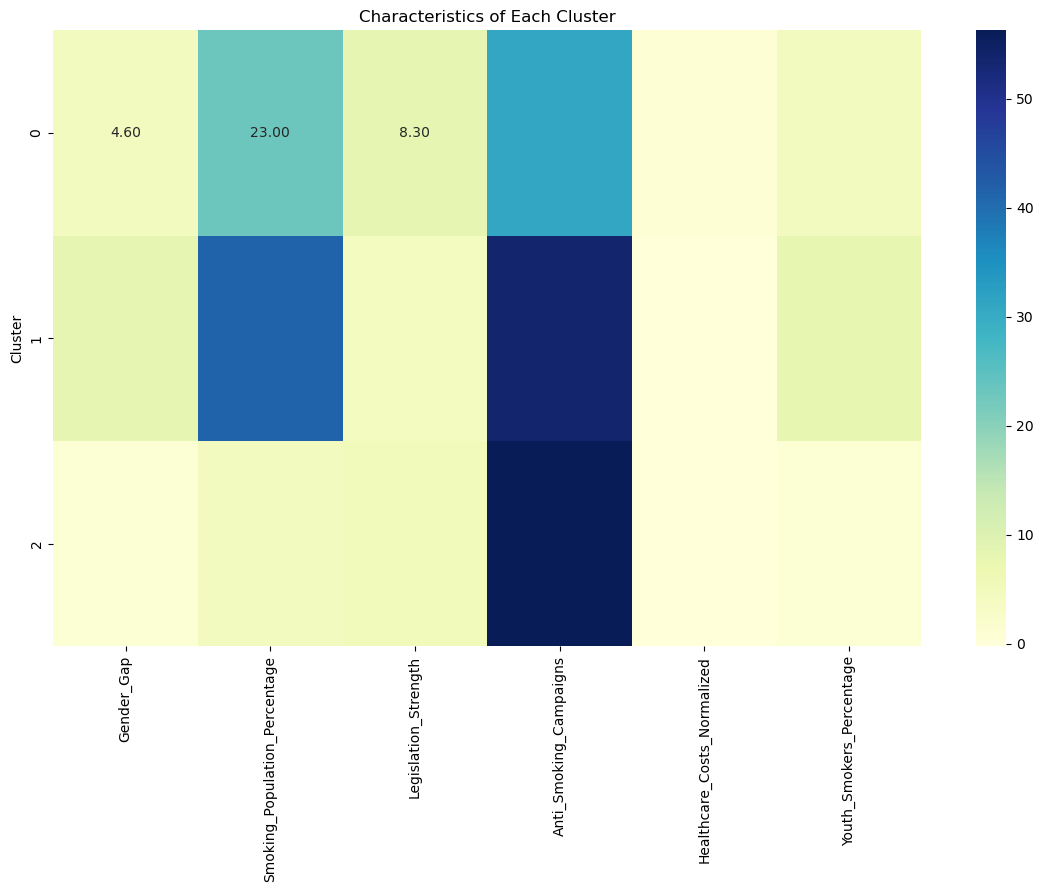


Countries in Cluster 0:
USA, UK, Germany, Australia, Japan, Russia, France, India, Brazil, China

Countries in Cluster 1:
France, Japan, China, India, Brazil, Russia, Australia, USA, UK, Germany

Countries in Cluster 2:
China, UK, Germany, France, India, Brazil, Russia, Australia, USA, Japan


<Figure size 1200x600 with 0 Axes>

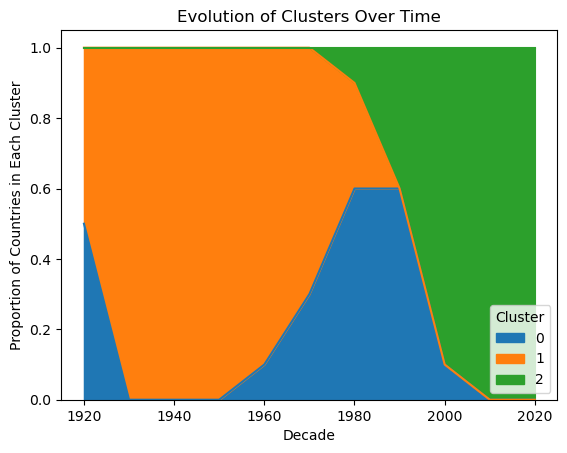


Average Policy Strength and Smoking Population Percentage by Cluster:
         Policy_Strength  Smoking_Population_Percentage
Cluster                                                
0              39.200000                      23.000000
1              57.942308                      41.384615
2              61.428571                       4.571429


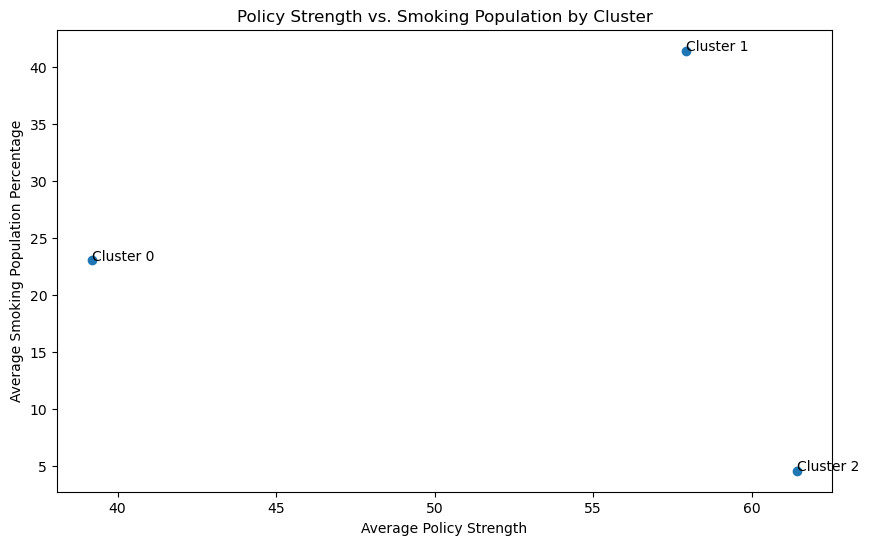

In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('cleaned.csv')  # Replace with your actual file name

# Data preprocessing
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df['Gender_Gap'] = df['Male_Smokers_Percentage'] - df['Female_Smokers_Percentage']

# Normalize Healthcare_Costs
scaler_healthcare = StandardScaler()
df['Healthcare_Costs_Normalized'] = scaler_healthcare.fit_transform(df[['Healthcare_Costs']])

# Prepare the data for clustering
features_for_clustering = ['Gender_Gap', 'Smoking_Population_Percentage', 
                           'Legislation_Strength', 'Anti_Smoking_Campaigns', 
                           'Healthcare_Costs_Normalized', 'Youth_Smokers_Percentage']
X_cluster = df[features_for_clustering]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Determine the optimal number of clusters using the elbow method
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Based on the elbow curve, choose the optimal number of clusters
optimal_k = 3  # Adjust this based on the elbow curve

# Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Gender_Gap'], df['Smoking_Population_Percentage'], 
                      c=df['Cluster'], cmap='viridis')
plt.xlabel('Gender Gap in Smoking Rates')
plt.ylabel('Overall Smoking Population Percentage')
plt.title('Clustering of Countries based on Smoking Characteristics')
plt.colorbar(scatter, label='Cluster')
plt.show()

# Analyze cluster characteristics
cluster_means = df.groupby('Cluster')[features_for_clustering].mean()
print("Cluster Characteristics:")
print(cluster_means)

# Visualize cluster characteristics
plt.figure(figsize=(14, 8))
sns.heatmap(cluster_means, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Characteristics of Each Cluster')
plt.show()

# Analyze countries in each cluster
for cluster in range(optimal_k):
    cluster_countries = df[df['Cluster'] == cluster]['Country'].unique()
    print(f"\nCountries in Cluster {cluster}:")
    print(", ".join(cluster_countries))

# Analyze cluster changes over time
df['Decade'] = (df['Year'].dt.year // 10) * 10
cluster_evolution = df.groupby(['Decade', 'Cluster']).size().unstack(fill_value=0)
cluster_evolution_pct = cluster_evolution.div(cluster_evolution.sum(axis=1), axis=0)

plt.figure(figsize=(12, 6))
cluster_evolution_pct.plot(kind='area', stacked=True)
plt.title('Evolution of Clusters Over Time')
plt.xlabel('Decade')
plt.ylabel('Proportion of Countries in Each Cluster')
plt.show()

# Analyze policy effectiveness
df['Policy_Strength'] = df['Legislation_Strength'] + df['Anti_Smoking_Campaigns']
policy_effect = df.groupby('Cluster')[['Policy_Strength', 'Smoking_Population_Percentage']].mean()
print("\nAverage Policy Strength and Smoking Population Percentage by Cluster:")
print(policy_effect)

plt.figure(figsize=(10, 6))
plt.scatter(policy_effect['Policy_Strength'], policy_effect['Smoking_Population_Percentage'])
for i, txt in enumerate(policy_effect.index):
    plt.annotate(f'Cluster {txt}', (policy_effect['Policy_Strength'][i], policy_effect['Smoking_Population_Percentage'][i]))
plt.xlabel('Average Policy Strength')
plt.ylabel('Average Smoking Population Percentage')
plt.title('Policy Strength vs. Smoking Population by Cluster')
plt.show()